<h1 align = "center",style ="font-size":40px>Option Pricing via Monte Carlo methods: Black-Scholes</h1>

<h2 style = "font-size:25px"><ins>THEORY</ins></h2> 

Under the Black-Scholes model, the price of an asset is governed by a stochastic differential equation

<a id ="SDE"></a>
$$
\begin{equation}\tag{1}
dS_t = \mu S_tdt + \sigma S_t dW_t
\end{equation}
$$

Assuming $S_t$ to be the price of an equity, this notebook applies Monte-Carlo methods to estimate the prices of call and put options. Results are compared against analytical formulae for option pricing, where available. It is possible to integrate <a href="#SDE">(1)</a> from $0$ to some $T$ analytically and use that expression, but I will solve it numerically using its discretized version

<a id ="Disc"></a>
$$
\begin{equation}\tag{2}
S_{t+\Delta t} = S_t e^{\left( \mu - \frac{\sigma^2}{2} \right) \Delta t + \sigma  \mathcal{N}(0,\sqrt{\Delta t}) + N_{\Delta t} \mathcal{N}(\mu_J,\sigma^2)} 
\end{equation}
$$
This provides a more generalized approach fit for several types of options. The price of an option at time $t_j$ is formally given by

$$ V(t_j, S_i(t_j)) = \mathbb{E}Q \left[ e^{-r(t_{j+1} - t_j)} V(t_{j+1}, S(t_{j+1})) \mid S(t_j) = S_i(t_j) \right] $$

where $V$ is either the call price or the put price. The following sections specify what this expression implies for various options.

<h3>European Options</h3>
European options are the most studied equity derivatives, due to their simplicity and the availablity of a closed-form expression. A European option is a right to purchase or sell a position that can only be exercised at the time of maturity, as given on the contract. Its payoff is dictated by the terminal price $S_T$<a href="#ref1"><sup>[1]</sup></a>:

$$\text{payoff} =  \begin{cases} 
& \text{max}\{(S_T-K),0 \} \ \text{for calls}\\
 & \text{max}\{(K-S_T),0 \} \ \text{for puts}
       \end{cases}
$$
where $K$ is the strike price . For a call option, the strike price is lower than the initial price $S_0$ whereas for a put option, it's higher than $S_0$. Because the payoff depends only on the asset value at maturity, and not on the path taken to get there, it suffices to 
only store the final value($S_T$) of each Monte-Carlo run. The price of the option is then calculated using the average of the payoffs from individual runs.

The price of an option is then simply the payoff discounted by the risk-free rate:
$$
\begin{align*}
C_{\text{eur}}(t) &= e^{-r(T-t)}\text{max}\{(S_T-K),0 \}\\
P_{\text{eur}}(t) &= e^{-r(T-t)}\text{max}\{(K-S_T),0 \}
\end{align*} 
$$
For European options, a closed form expression is available for stocks modelled by <a href = "#SDE">(1)</a>:
$$
\begin{align*}
C_{\text{eur}}(t) &= S N(d_1) - K e^{-r(T-t)} N(d_2)\\
P_{\text{eur}}(t) &= K e^{-r(T-t)} N(-d_2) - S N(-d_1)
\end{align*} 
$$
where 

$$
\begin{align*}
d_1 &= \frac{\log(S/K) + (r + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}\\
d_2 &= d_1 - \sigma \sqrt{T-t}
\end{align*} 
$$
See <a href = "https://github.com/praveer-kg/Finance_Public/blob/main/Option%20Pricing/1.%20Black-Scholes%20and%20Implied%20Volatility.ipynb">this notebook</a> for more details.

<h3>Asian Options</h3>
<h4>Fixed Strike</h4>
For fixed strike price Asian (or average value)options, the payoff is determined by the average price<a href="#ref1"><sup>[1]</sup></a> over $0$ to $T$:

$$\text{payoff} =  \begin{cases} 
& \text{max}\{(\braket{S}-K),0 \} \ \text{for calls}\\
 & \text{max}\{(K-\braket{S}),0 \} \ \text{for puts}
       \end{cases}
$$

where $\braket{.}$ indicates the mean of a variable. The strike price here is fixed, but a floating strike price is also sometimes applied(next subsection). Using the arithmetic mean, the option prices are given by
$$
\begin{align*}
C_{\text{avg}}(T) &= e^{-rT}\text{max}\{(A(S)-K),0 \}\\
P_{\text{avg}}(T) &= e^{-rT}\text{max}\{(K-A(S)),0 \}
\end{align*} 
$$

where $A(S) = \frac{1}{n}\sum_{i=0}^{n} S_i$.

Using the geometric mean instead, we have

$$
\begin{align*}
C_{\text{geo}}(T) &= e^{-rT}\text{max}\{(G(S)-K),0 \}\\
P_{\text{geo}}(T) &= e^{-rT}\text{max}\{(K-G(S)),0 \}
\end{align*} 
$$
where $$G(S) = \text{exp}\left(\frac{1}{n}\sum_{i=0}^{n} \ln(S_i) \right)$$ is the geometric mean. Its advantage over the simpler arithmetic mean is that it enables a closed-form expression to be derived for Asian option prices<a href="#ref2"><sup>[2]</sup></a>. To write down this formula, it is convenient to first define a couple of constants:

$$
\begin{align*}
\sigma_n^2 &= σ^2  \frac{(n+1)(2n+1)}{6n^2}       \\
r_n  &= \frac{σ_n^2}{2} + (r - \frac{σ^2}{2})\frac{n+1}{2n} 
\end{align*} 
$$

The option prices are then given by
$$
\begin{align*}
C_{\text{geo}}(T) &= e^{-rT} [S_0 e^{r_n T} N(d1) - K N(d2)]\\
P_{\text{geo}}(T) &= e^{-rT}[ K N(-d2) -  S_0 e^{r_n T} N(-d1)]
\end{align*} 
$$
where 
$$
\begin{align*}
d_1 &= \frac{\log(S_0/K) + (r_n + \frac{\sigma_n^2}{2})T}{\sigma_n \sqrt{T}}\\
d_2 &= d_1 - \sigma_n \sqrt{T}
\end{align*} 
$$
Note that while the price of European options can be calculated at any time $t$, the price of Asian options can only be calculated at maturity$(t = T)$.

<h4>Floating Strike price</h4>
For a floating strike price, the equity price entering the payoff is fixed:
$$
\begin{align*}
C_{\text{geo}}(T) &= e^{-rT}\text{max}\{(S_T - A(S)),0 \}\\
P_{\text{geo}}(T) &= e^{-rT}\text{max}\{(A(S)-S_T),0 \}
\end{align*} 
$$

<h3>Bermudan Options</h3>
A Bermudan option allows the purchaser to exercise their right to a position at certain points of time before maturity. Unlike European options which can only be exercised at maturity, a Bermudan contract has several predetermined exercise dates written into it. At each of these dates, the buyer must make a decision to either exercise their option or wait for the next opportunity to do so, depending on the projected payoffs. For simplicity, assume that the buyer may exercise his right to the options at $t_1$, $t_2$ and $T$. At time $t_1$, the payoff is given by

$$
\text{payoff}_{t_1} =  \begin{cases} 
\text{max}\{(S_{t_1}-K),0 \} \ \text{for calls}\\
 \text{max}\{(K-S_{t_1}),0 \} \ \text{for puts}
       \end{cases}
$$
Should the buyer decide to hold on instead, the potential payoff at $t_2$ is given by

$$
\text{payoff}_{t_2} =  \begin{cases} 
e^{-r (t_2-t_1)}\text{max}\{(S_{t_2}-K),0 \} \ \text{for calls}\\
 e^{-r (t_2-t_1)}\text{max}\{(K-S_{t_2}),0 \} \ \text{for puts}
       \end{cases}
$$
The option is to be exercised if $\text{payoff}_{t_1}$ > $\text{payoff}_{t_2}$ and left unexercised otherwise. This notebook implements the Least Squares Monte Carlo(LSMC) proposed by Longstaff and Schwartz<a href="#ref3"><sup>[3]</sup></a>, where the continuation value(i.e, $\text{payoff}_{t_2}$) is calculated by regressing the simulated continuation value against the simulated stock prices at $t_1$. The predicted continuation values are then used to determine the decision to exercise the option(or not) at time $t_1$. I have assumed a quadratic relationship between the simulated continuation values and simulated stock prices
$$
Y \sim a X^2 + b X + c
$$
and kept overfitting in check by applying Ridge regression, which penalizes large coefficients.

<h3>American Options</h3>
A Bermudan option allows the purchaser to exercise their right to a position at all times before maturity. It is a generalization of the Bermudan contract which only allows exercise on specific dates. With American options, the buyer must make a decision to either exercise their option or not on every single day between purchase and maturity. As before, the payoff at time $t$ is given by

$$
\text{payoff}_{t} =  \begin{cases} 
\text{max}\{(S_{t}-K),0 \} \ \text{for calls}\\
 \text{max}\{(K-S_{t}),0 \} \ \text{for puts}
       \end{cases}
$$
Should the buyer decide to hold on instead, the potential payoff on the next day is given by
$$
\text{payoff}_{t + \Delta t} =  \begin{cases} 
e^{-r \Delta t}\text{max}\{(S_{t + \Delta t}-K),0 \} \ \text{for calls}\\
 e^{-r \Delta t}\text{max}\{(K-S_{t + \Delta t}),0 \} \ \text{for puts}
       \end{cases}
$$
where $\Delta t$ is taken to be one day, which is $1/252$ in trading years. The LSMC method described before still applies here, whereby the continuation value($\text{payoff}_{t + \Delta t}$) is calculated by regressing the simulated continuation value against the simulated stock prices at $t$. The relationship between these variables is again assumed to be quadratic
$$
Y \sim a X^2 + b X + c
$$
and estimated via Ridge regression.


<h2 style = "font-size:25px"><ins>CODE</ins></h2> 
The code in this notebook calculates the prices for European and Asian options using Monte-Carlo simulations of the underlying stock price from $t=0$ to $t=T$. The analytical values are also calculated, when possible, for European and Asian options. Bermudan and American options are calculated using the Least Squares Monte Carlo method described above. We begin by importing the relevant modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

The two functions below calculate the analytical prices of European and Asian options using the Black-Scholes formula. They serve as a benchmark for the numerical(Monte Carlo) method.

In [2]:
def Black_Scholes(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    put = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    
    return call,put

def Black_Scholes_Asian(S0, K, r, sigma, T, n):
    σn = np.sqrt(σ**2 * (((n+1)*(2*n+1))/(6*(n**2))))
    rn  = (0.5*σn**2) + (r - (0.5*σ**2))*((n+1)/(2*n))
    d1 = (np.log(S0/K) + ((rn + 0.5*σn**2)*T)) / (σn*np.sqrt(T))
    d2 = d1 - (σn*np.sqrt(T))

    call_price = np.exp(-r* T) * (S0 * np.exp(rn * T) * norm.cdf(d1) - K * norm.cdf(d2))
    put_price  =  np.exp(-r* T) * ( K*norm.cdf(-d2) - S0 * np.exp(rn * T) * norm.cdf(-d1))
    
    return call_price,put_price

The function below simulates stock price movements from $t = 0$ to $t = T$ using equation <a href="#Disc">(2)</a>. The vectorized approach here speeds up calculations for a single stock(although it may be a hinderance for a portfolio of stocks).

In [3]:
def S_Monte_Carlo(returns,S0,r,n_runs):
    np.random.seed(0)
    N_days = len(returns)
    Δt = 1/252                          #time step (in years) 
    σ = np.std(returns)                 #historical std. dev.
    S = np.zeros((n_runs,N_days))
    S[:,0] = S0
    for i in range(1, N_days):
        dW = np.random.normal(0, np.sqrt(Δt),n_runs)  #Brownian term
        diffusion = (r - 0.5 * σ ** 2) * Δt + σ * dW
        S[:,i] = S[:,i-1] * np.exp(diffusion)
    
    S_T = S[:,-1]
    S_avg = np.mean(S,axis=1)
    S_geo = np.exp(np.mean(np.log(S),axis=1))

    return S,np.array(S_T),np.array(S_avg),np.array(S_geo)

The functions in the following cell read in simulated stock data, the strike price $K$, the risk-free rate $r$, time to maturity $T$ and the volatility $\sigma$ to calculate the price of European and Asian options. Only the terminal price $S_T$ is relevant for European options whereas the average($S_\text{avg}$ or $S_\text{geo}$), is also required for Asian options.

In [4]:
def European_Options(S_T,K,r,T,σ):
    call_MC = np.exp(-r*T)*np.mean(np.maximum(S_T - K, 0))
    put_MC = np.exp(-r*T)*np.mean(np.maximum(K-S_T, 0))
    call_BS, put_BS = Black_Scholes(S0, K, T, r, σ)
    
    print("\nEuropean Options:")
    print("Monte Carlo Call Price= ",call_MC)
    print("Analytical Call Price= ",call_BS)
    print("Monte Carlo Put Price= ",put_MC)
    print("Analytical Put Price= ",put_BS)
    print('\u2500' * 60)

def Asian_Options(S_T,S_avg,S_geo,K,r,T,σ):
    
    #calculate geometric-mean prices
    call_geo = np.exp(-r*T)*np.mean(np.maximum(S_geo-K,0))
    put_geo = np.exp(-r*T)*np.mean(np.maximum(K-S_geo,0))
    call_geo_ana,put_geo_ana = Black_Scholes_Asian(S0, K, r, σ, T, len(returns))
    print("\nAsian Options(Geometric Average):")
    print("Monte Carlo Call Price= ",call_geo)
    print("Analytical Call Price= ",call_geo_ana)
    print("Monte Carlo Put Price= ",put_geo)
    print("Analytical Put Price= ",put_geo_ana)
    print('\u2500' * 60)
    
    #calculate arithmetic-mean prices
    Acall = np.exp(-r*T)*np.mean(np.maximum(S_avg - K, 0))
    Aput = np.exp(-r*T)*np.mean(np.maximum(K - S_avg, 0))
    print("\nAsian Options(Arithmetic Average):")
    print("Monte Carlo Call Price= ",Acall)
    print("Monte Carlo Put Price= ",Aput)   
    print('\u2500' * 60)
    
    Acall = np.exp(-r*T)*np.mean(np.maximum(S_T - S_avg, 0))
    Aput = np.exp(-r*T)*np.mean(np.maximum(S_avg-S_T, 0))
    print("\nAsian Options(Floating Strike):")
    print("Monte Carlo Call Price= ",Acall)
    print("Monte Carlo Put Price= ",Aput)   
    print('\u2500' * 60)

The function below reads in simulated stock prices from $0$ to $T$ for every run as well as a list of possible exercise times(note that the final time is $T = 1$ y). At each $t_i$, the function checks whether the payoff is greater at the current exercise window or the next one $t_{i+1}$ by calculated immediate payoff and the predicted continuation values.

In [5]:
def Bermudan(S,exercise_times):
    n_runs,n_steps = np.shape(S)
    n_times = len(exercise_times)
    
    payoffs =  np.maximum(S[:, -1] - K, 0)    
    #work backwards from maturity
    for j in reversed(range(n_times-1)):
        index = int(exercise_times[j]* n_steps)
        #payoff if held
        PF = PolynomialFeatures(degree=2, include_bias=False)
        y = np.exp(-r * (exercise_times[j+1]-exercise_times[j])) * payoffs
        X = PF.fit_transform(S[:, index].reshape(-1, 1))        
        model = Ridge(alpha=1.0).fit(X, y)
        continuation_value = model.predict(X)
        #payoff if exercised
        immediate_payoff = np.maximum( S[:, index] -K, 0)
        payoffs = np.maximum(immediate_payoff, continuation_value)
    call = np.exp(-r * exercise_times[0]) * np.mean(payoffs)
    
    payoffs =  np.maximum(K-S[:, -1], 0)
    #work backwards from maturity
    for j in reversed(range(n_times-1)):    
        index = int(exercise_times[j]* n_steps)
        #payoff if held
        PF = PolynomialFeatures(degree=2, include_bias=False)
        y = np.exp(-r * (exercise_times[j+1]-exercise_times[j])) * payoffs
        X = PF.fit_transform(S[:, index].reshape(-1, 1))        
        model = Ridge(alpha=1.0).fit(X, y)
        continuation_value = model.predict(X)
        #payoff if exercised
        immediate_payoff = np.maximum(K- S[:, index], 0)
        payoffs = np.maximum(immediate_payoff, continuation_value)
    put = np.exp(-r * exercise_times[0]) * np.mean(payoffs)
    print("\nBermudan Options")
    print("Monte-Carlo Call Price = ",call)
    print("Monte-Carlo Put Price = ",put)
    print('\u2500' * 60)

Finally, the function ```American(S)``` similarly evaluates American options by comparing immediate payoffs with continuation values every day up to maturity.

In [6]:
def American(S):
    n_runs,n_steps = np.shape(S)
    Δt = 1/252
    payoffs =  np.maximum(S[:, -1] - K, 0)    
    #work backwards from maturity
    for i in reversed(range(n_steps-1)):
        #payoff if held
        PF = PolynomialFeatures(degree=2, include_bias=False)
        y = np.exp(-r * Δt) * payoffs
        X = PF.fit_transform(S[:, i].reshape(-1, 1))        
        model = Ridge(alpha=1.0).fit(X, y)
        continuation_value = model.predict(X)
        #payoff if exercised
        immediate_payoff = np.maximum( S[:, i] -K, 0)
        payoffs = np.maximum(immediate_payoff, continuation_value)
    call = np.exp(-r * 0) * np.mean(payoffs)
    
    payoffs =  np.maximum(K-S[:, -1], 0)
    #work backwards from maturity
    for i in reversed(range(n_steps-1)):
        #payoff if held
        PF = PolynomialFeatures(degree=2, include_bias=False)
        y = np.exp(-r * Δt) * payoffs
        X = PF.fit_transform(S[:, i].reshape(-1, 1))        
        model = Ridge(alpha=1.0).fit(X, y)
        continuation_value = model.predict(X)
        #payoff if exercised
        immediate_payoff = np.maximum( K- S[:, i], 0)
        payoffs = np.maximum(immediate_payoff, continuation_value)
    put = np.exp(-r * 0) * np.mean(payoffs)
    print("\nAmerican Options")
    print("Monte-Carlo Call Price = ",call)
    print("Monte-Carlo Put Price = ",put)
    print('\u2500' * 60)

Before calling any of the above functions, it is necessary to provide a value for the volatility $\sigma$ and a time to maturity $T$. The main function below calculates $\sigma$ from stock data queried via $\texttt{yfinance}$ over a period of one year for a given ticker(Amazon in this case). It also sets $T$ to $1$.

In [7]:
if __name__=="__main__":
    
    ticker = "AMZN"                            #choose stock to model
    r = 0.04                                   #risk-free rate
    start =pd.Timestamp(2024,2,1)
    stop = pd.Timestamp(2025,2,1)
    
    data = yf.download(ticker, start, stop)    #download data
    
    close_prices = data["Close"]
    S0 = close_prices.iloc[0,0]                #initial stock price
    returns = close_prices.pct_change().dropna()
    returns = returns[ticker].to_numpy()
    n_runs = 100000                            #number of Monte Carlo runs
    
    S,S_T,S_avg,S_geo = S_Monte_Carlo(returns,S0,r,n_runs)       
    K = S0
    T = len(returns)/251
    σ = np.std(returns)
    
    European_Options(S_T,K,r,T,σ) 
    Asian_Options(S_T,S_avg,S_geo,K,r,T,σ) 
    
    exercise_times = [0.2,0.4,0.6,0.8,T]       #for Bermudan options(time in years)
    Bermudan(S, exercise_times)
    American(S)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



European Options:
Monte Carlo Call Price=  6.185711002536537
Analytical Call Price=  6.2323321788813075
Monte Carlo Put Price=  0.011022753225226946
Analytical Put Price=  0.011264012908762888
────────────────────────────────────────────────────────────

Asian Options(Geometric Average):
Monte Carlo Call Price=  3.07089193329253
Analytical Call Price=  3.102931961818934
Monte Carlo Put Price=  0.014703233429511006
Analytical Put Price=  0.01497461633942006
────────────────────────────────────────────────────────────

Asian Options(Arithmetic Average):
Monte Carlo Call Price=  3.0850831344157803
Monte Carlo Put Price=  0.01462191799087677
────────────────────────────────────────────────────────────

Asian Options(Floating Strike):
Monte Carlo Call Price=  3.119777075934122
Monte Carlo Put Price=  0.015550043047717836
────────────────────────────────────────────────────────────

Bermudan Options
Monte-Carlo Call Price =  6.188888913250507
Monte-Carlo Put Price =  0.15719154825282852
───

The bar graphs below provide a comparison of the call and put prices for various options, with analytical results plotted where available.

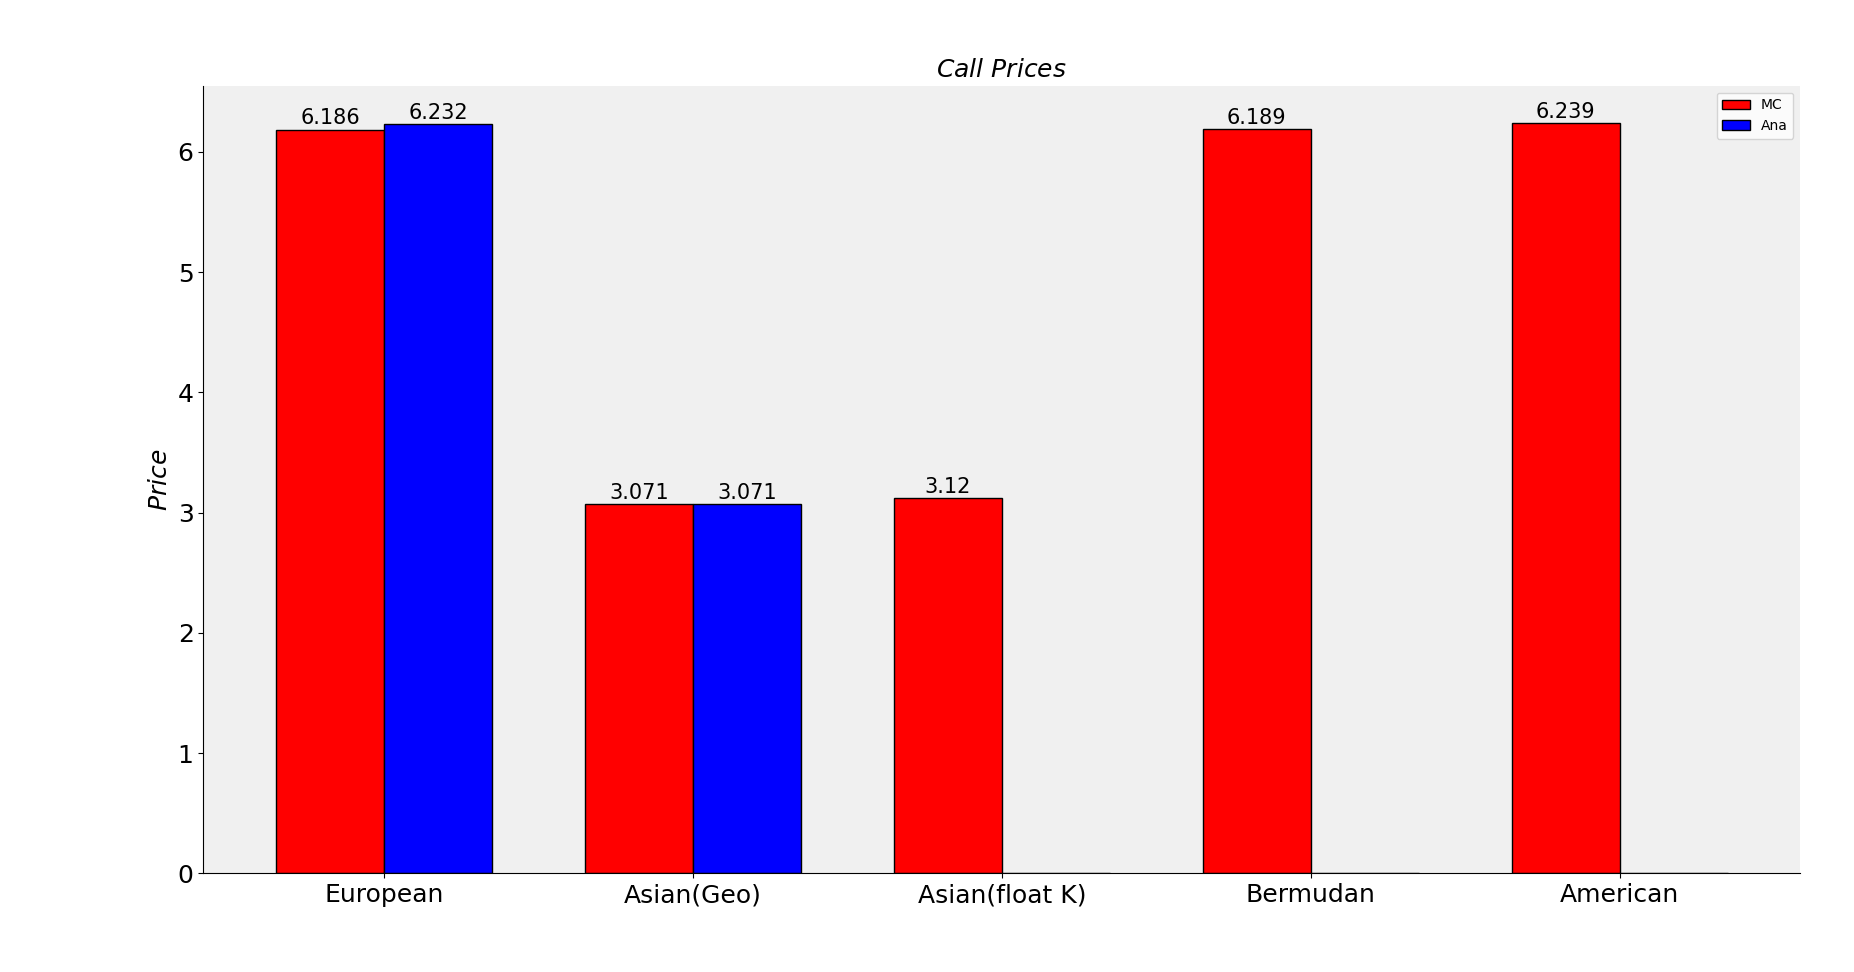

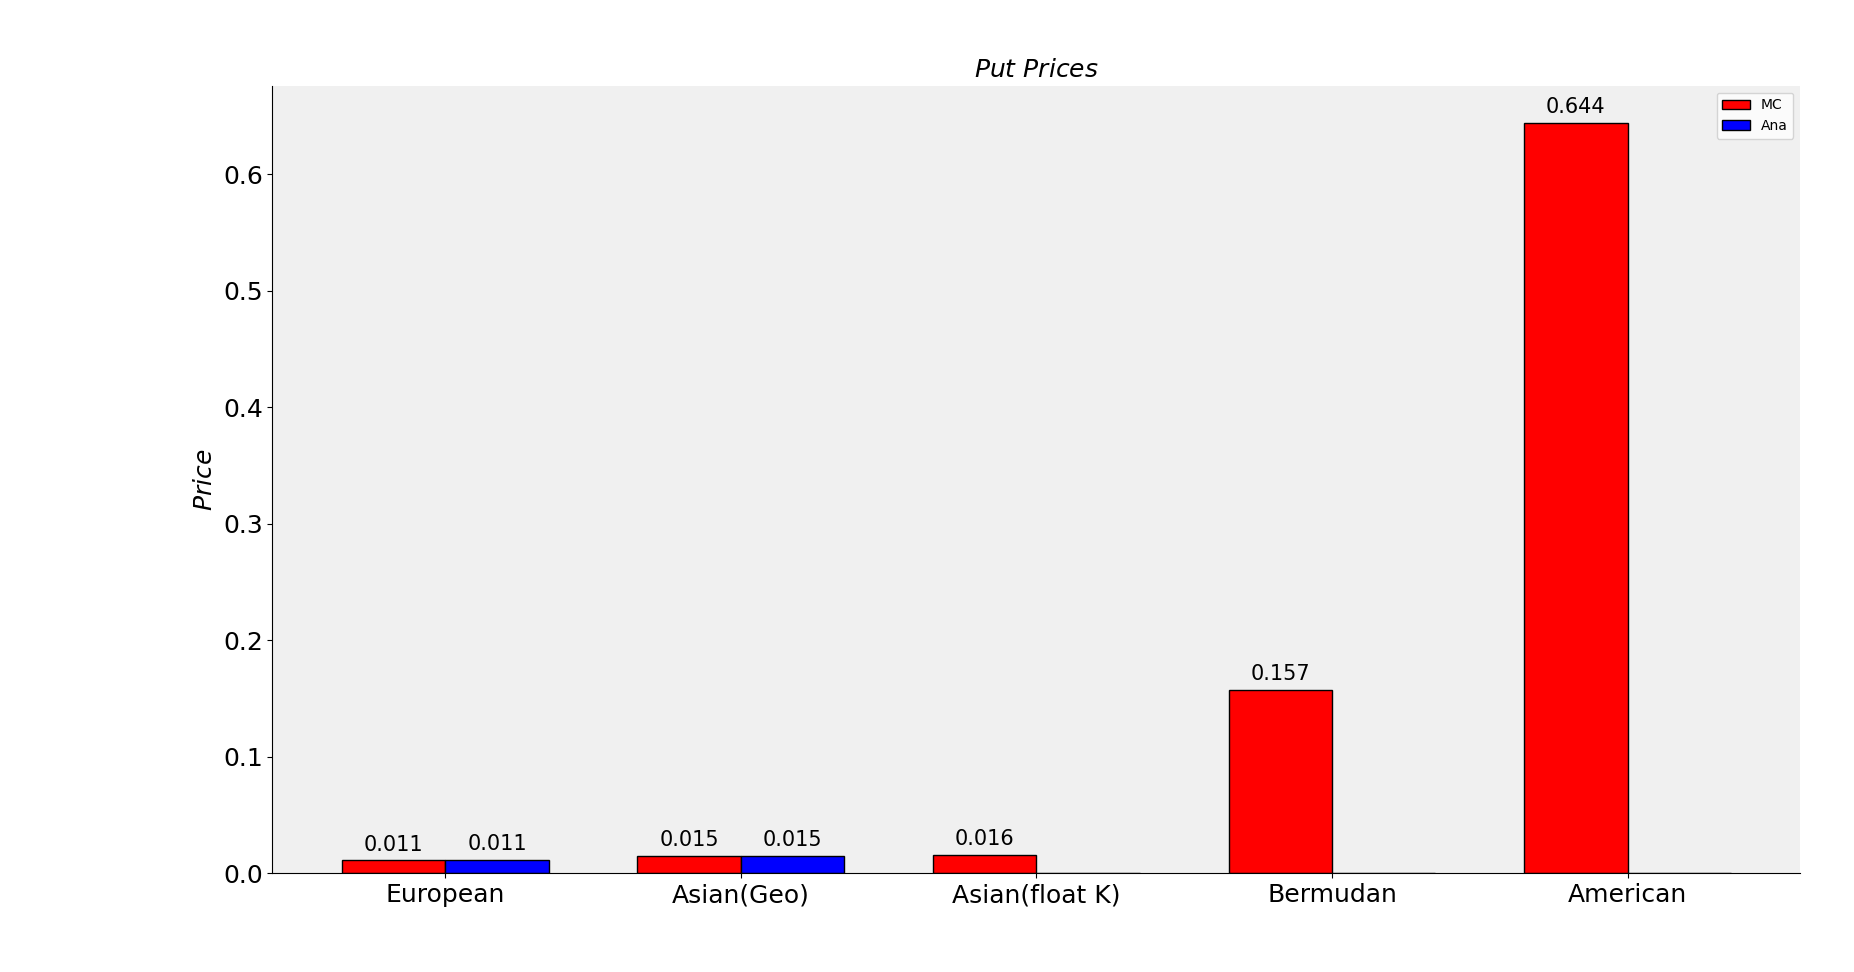

## References
<a id="ref1"></a>[1]  Odegaard, B.A. (2007), "<a href="https://ba-odegaard.no/gcc_prog/recipes/recipes.pdf">*Financial Numerical Recipes in C++*</a>" 

<a id="ref2"></a>[2]  Don L. McLeish (2005), "<a href="https://www.wiley.com/en-us/Monte+Carlo+Simulation+and+Finance-p-9780471677789">*Monte Carlo Simulation and Finance*</a>", Wiley Finance

<a id="ref3"></a>[3]  Francis A. Longstaff, Eduardo S. Schwartz(2001) "<a href="https://people.math.ethz.ch/~hjfurrer/teaching/LongstaffSchwartzAmericanOptionsLeastSquareMonteCarlo.pdf">*Valuing American Options by Simulation: A Simple Least-Squares Approach*</a>", The Review of Financial Studies, Volume 14, Issue 1

<a id="ref4"></a>[4]  "https://en.wikipedia.org/wiki/Ridge_regression"